# Chapter 9: Portfolio Theory

Understanding portfolio theory is very important in learning finance. It is well
known that don't put all your eggs in one basket, that is, it is a great idea to diversify
away your risk. However, very few know the implied assumption behind such a
famous idiom. In this chapter, we will discuss various risk measures for individual
stocks or portfolios, such as Sharpe ratio, Treynor ratio, Sortino ratio, how to
minimize portfolio risk based on those measures (ratios), how to set up an objective
function, how to choose an efficient portfolio for a given set of stocks, and how to
construct an efficient frontier. Our focus is on how to apply portfolio theory by using
real-world data. For instance, today we have $2 million cash and plan to purchase
IBM and Walmart stocks. If we have 30% invested in the first one and the rest in the
second, what is our portfolio risk? What is the least risky portfolio that we could
form based on those two stocks? How about 10 or 500 stocks? In this chapter, the
following topics will be covered:

• Introduction to portfolio theory

• A 2-stock portfolio

• N-stock portfolio

• Correlation versus diversification effect

• Producing a return matrix

• Generating an optimal portfolio based on Sharpe ratio, Treynor ratio, and
Sortinor ratio

• Constructing an efficient frontier

• Modigliani and Modigliani performance measure (M2 measure)

## Intro to Portfolio Theory

The keyword for the portfolio theory is diversification, while the keyword for
diversification is correlation. In other words, correlation is used to measure how
closely two stocks or portfolios are moving together. The objective of portfolio
theory is to allocate our assets optimally with respect to risk and return. Markowitz
(1952) argues that we should consider only the first two moments of a security's
return distribution: mean and variance. For financial markets, several important
assumptions are made, such as stock markets are inefficient, a typical investor is
rational, and an arbitrage opportunity would not last long. For the preferences
between two stocks, for a given risk, a rational investor would prefer stock with
a higher expected return; for a given return, a rational investor prefers stock with
a lower risk level. Sometimes, a single period portfolio optimization is called
Markowitz Portfolio Optimization. The input includes a return matrix, and a variance
and covariance matrix, while the output is an efficient portfolio. By connecting
numerous efficient portfolios, an efficient frontier is formed. Here, we start with the
simplest scenario: a two-stock portfolio.

## Two Stock Portfolio

The rest of the notes are on google docs - this is simply for analyzing results. Assume that the volatilities (standard deviations) of two stocks are 0.06 and 0.24 and they are perfectively negatively correlated. What are two weights in order to form a
zero-risk portfolio? There exist several methods to find a solution.

Method 1: we could manually find a solution: plug in given values into Equation (3)
and set it equal to zero where x=x1 and x2=1-x:

In [2]:
import scipy as sp
import numpy as np
a=1
b=6
c=3
inside=b**2-4*a*c
if inside>0:
    squared=np.sqrt(inside)
print("x1=",(b+squared)/(2*a))
print("x2=",(b-squared)/(2*a))

x1= 5.449489742783178
x2= 0.5505102572168221


Method 2: For a given pair of standard deviations (or a pair of variances) plus a
correlation between those two stocks, we generate many weights for stock 1, such as
0, 0.001, 0.002, 0.003, and the like. Remember that w2=1-w1. By applying Equation (3),
we estimate the variances of this 2-stock portfolio. Our final solution will be the pair
of w1 and w2 achieving the minimum portfolio variance, see the following code:

In [4]:
sigma1=0.06
sigma2=0.24
var1=sigma1**2
var2=sigma2**2
rho=-1
n=1000
portVar=10 # assign a big number
tiny=1.0/n # start by assigning a weight of 0.001 to stock 1, gradually increase

for i in np.arange(n):
    w1=i*tiny
    w2=1-w1
    var= w1**2*var1 +w2**2*var2+2*w1*w2*rho*sigma1*sigma2
    if(var<portVar):
        portVar=var
        finalW1=w1
#print(vol)
print("min vol=",np.sqrt(portVar), "w1=",finalW1)


min vol= 9.313225746154785e-10 w1= 0.8


First, the result confirms our previous result with w1=0.8 and w2=0.2. In the
program, we have 1000 pairs of w1 and w2. A small value, called tiny, is
1/1000=0.001. The first pair of two weights is 0.1% and 99.9%. A very big number
is assigned to our solution variable, that is, as an initial value. In this program,
portVar=10. Other big numbers would work perfectly, such as 100. Here is the logic:
based on the first pair of w1 and w2, we estimate the portfolio variance. If this new
portfolio variance is less than portVar, we replace portVar with this new value
and record w1 as well. If the new portfolio variance is bigger than portVar, we do
nothing. Repeat the same procedure until we finish the loop. Here is an analogy.
Assume that we want to find the tallest person among 1,000 persons. Assume that
we have a variable call tallestPerson and its initial vale is 0.1 inch. Since every
person will be taller than this value, the first person's height will replace this value. If
the next person's height is higher than this variable, we replace it. Otherwise, we go
to the next one. The procedure is repeated until the last person. In terms of efficiency,
one small trick is to estimate var1 and var2 just once.

In finance, it is a convention to use both variance and standard deviation to represent
risk, since they describe uncertainty. Usually, we use standard deviation of returns
to represent the volatility. It is a good idea to look at the impact of correlation on
the efficient frontier.

In [6]:

np.random.seed(123)
n=1000
rho=0.3
x1=np.random.normal(size=n)
x2=np.random.normal(size=n)
y1=x1
y2=rho*x1+np.sqrt(1-rho**2)*x2
print(np.corrcoef(y1,y2))

[[1.         0.28505213]
 [0.28505213 1.        ]]


## Optimization – minimization

Before discussing how to generate an optimal portfolio, it is necessary to study a
few optimization functions. In the following example, we minimize our objective
function of y:

y = 3.2 + 5 x^2

First we wil display the graph.

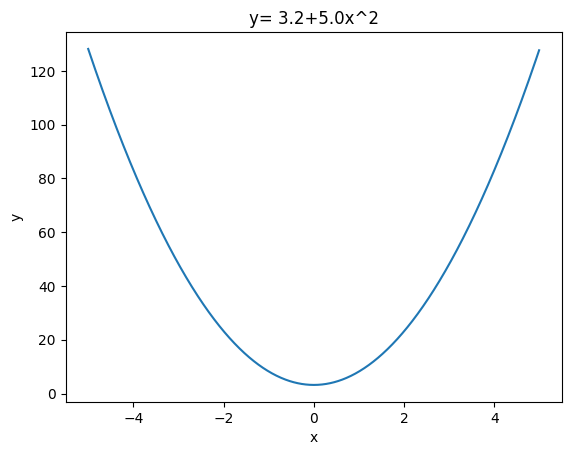

In [7]:
import matplotlib.pyplot as plt
x=np.arange(-5,5,0.01)
a=3.2
b=5.0
y=a+b*x**2
plt.plot(x,y)
plt.title("y= "+str(a)+"+"+str(b)+"x^2")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

To make the program more general, two coefficients of a and b are generated.
Apparently, since the power of x is 2, y is minimized only when x is 0. The Python
code for minimization is as follows:

In [10]:
from scipy.optimize import minimize
def myFunction(x):
    return (3.2+5*x**2)
x0=100
res = minimize(myFunction,x0,method='nelder-mead',options={'xtol':1e8,'disp': True})


Optimization terminated successfully.
         Current function value: 3.200000
         Iterations: 24
         Function evaluations: 48


/var/folders/k4/npf5jb1d4x13y6z87pdgxb9m0000gp/T/ipykernel_8955/1904061227.py:5: OptimizeWarning: Unknown solver options: xtol
  res = minimize(myFunction,x0,method='nelder-mead',options={'xtol':1e8,'disp': True})


In the preceding program, the major function used is called the scipy.optimize.
minimize() function. The first input is our objective function. In this case, it is our y
function. The second value is our input value, that is, initial value. Since there is only
one independent variable of x for the y function, x0 is a scalar. For the third input
value, method, we have several choices: NelderMead.